In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, time

In [18]:
img = cv2.imread('index.jpeg',0) 
img1 = cv2.imread('index.jpeg') 

In [17]:
# returns an array of Blue, Green, Red values
impx=img[100,100]
print(impx)

#returns the  Blue values
impxb=img[100,100,0]
print(impxb)

#modify the pixel value of my image
#img[100,100]=[0,0,0]
print(img[100,100])

[255 255 255]
255
[255 255 255]


In [18]:
# accessing RED value
img.item(100,100,2)

255

In [19]:
#modifying the red value
#img.itemset((100,100,2),25)
print(img.item(100,100,2))

255


In [20]:
#image properties
print(img.shape)
#total number of pixel
print(img.size)
#image data type
print(img.dtype)

(1080, 810, 3)
2624400
uint8


In [21]:
#img[:,:,1] = 22

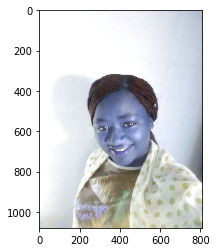

In [22]:
plt.imshow(img)

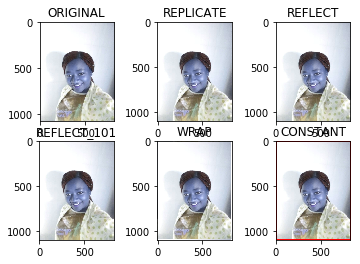

In [23]:
BLUE=[255,0,0]
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

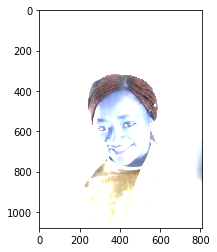

In [24]:
#cv2 additiom
plt.imshow(cv2.add(img,img1))

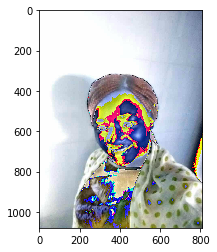

In [25]:
#Numpy addition
plt.imshow(img+img1)

In [26]:
#There is a difference between OpenCV addition and Numpy addition. 
#OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

(259, 460, 3) (240, 195, 3)


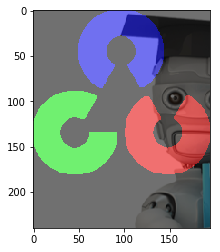

In [27]:
ml   = cv2.imread('ml.png')
#frog   = cv2.imread('ml.png')
frog = cv2.imread('opencv-logo.png')
print(ml.shape,frog.shape)
min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

dst=cv2.addWeighted(ml[:min_r, :min_c], 0.4,
                      frog[:min_r, :min_c], 0.5, 10)
plt.imshow(dst)
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Create a slide show of images in a folder with smooth transition between images using cv2.addWeighted function

In [28]:
__author__ = 'abitran'

# first we define the folder that contains the images
my_folder = 'album'

# we create a blank image of the same dimension as the images inside de folder
imgfirst = np.zeros((1080, 810,3), np.uint8)

# we define the location of the folder
my_location = "./"+ my_folder

# we loop through the files inside the folder
for file in os.listdir(my_location):

# we read a file    
    img = cv2.imread(my_location + '/' + file)

# blending formula from cv2 docs:
# dst = alpha*img1 + beta*img2 + gamma, where gamma = 0

# we create a loop from 1-10 (including 10) to apply alpha 
    for alpha in range(1, 11):

# we divide alpha by 10 to create a float
        alpha = alpha/10.0
# to create a transition effect, beta must be:
        beta = 1 - alpha
# we load the transition into the image canvas
        cv2.imshow('album', cv2.addWeighted(img, alpha, imgfirst, beta, 0.0))
        time.sleep(0.1)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    if cv2.waitKey(5) & 0xff == ord('q'):
        break
# we assign the img to the first one
    imgfirst = img
     
cv2.destroyAllWindows()

In [29]:
e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()

In [30]:
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

1.593263085


In [31]:
cv2.useOptimized() 

True

In [32]:
 %timeit res = cv2.medianBlur(img,49)

10 loops, best of 5: 63.4 ms per loop


In [33]:
x = 5
%timeit y=x**2

10000000 loops, best of 5: 148 ns per loop


In [34]:
%timeit y=x*x

10000000 loops, best of 5: 24 ns per loop


In [35]:
z = np.uint8([5])
%timeit y=z*z

The slowest run took 24.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 340 ns per loop


In [36]:
%timeit y=np.square(z)

The slowest run took 26.36 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 327 ns per loop


Changing Colorspaces


In [37]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print(flags)

In [38]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

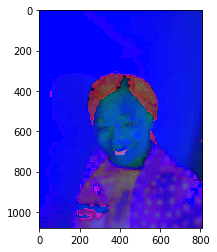

In [39]:
plt.imshow(img)

In [40]:
import cv2
import numpy as np

In [4]:
cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    
    lower_green = np.array([50, 50, 120])
    upper_green = np.array([70, 255, 255]) 

    # Threshold the HSV image to get only blue colors
    mask1 = cv2.inRange(hsv, lower_blue, upper_blue)
    mask2 = cv2.inRange(hsv, lower_red, upper_red)
    mask3 = cv2.inRange(hsv, lower_green, upper_green)
    # Bitwise-AND mask and original image
    mask = cv2.bitwise_or(mask1,mask2,mask3)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
   

cv2.destroyAllWindows()

In [4]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print (hsv_green)

[[[ 60 255 255]]]


Exercises
Try to find a way to extract more than one colored objects, for eg, extract red, blue, green objects simultaneously.


In [6]:
img.shape

(1080, 810, 3)

In [8]:
i=img.flatten()

In [9]:
i.shape

(2624400,)

Image Thresholding

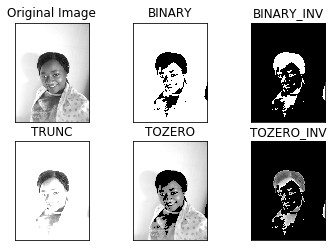

In [10]:
#img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

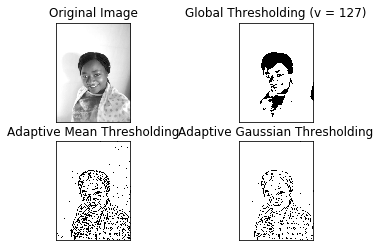

In [40]:
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [171]:
img = cv2.imread('index.jpeg',0) 

In [162]:
img.shape

(1080, 810)

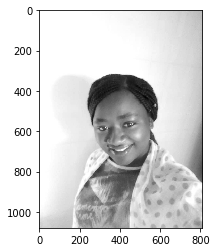

In [163]:
plt.imshow(img,cmap='gray')

In [164]:
img.dtype

dtype('uint8')

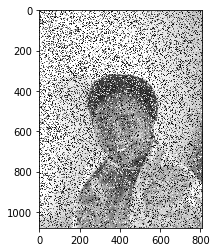

In [165]:
noise =np.random.randint(0,255, size=img.shape)
img = np.where(np.random.uniform(size=img.shape)>.4,img,noise)
plt.imshow(img,cmap='gray')
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [166]:
img.dtype

dtype('int64')

In [167]:
img=img.astype(np.uint8)

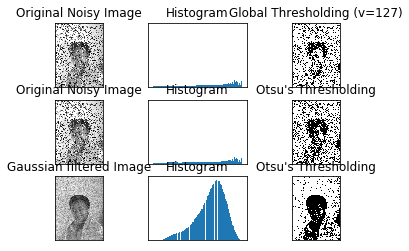

In [118]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [119]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(2160, 1620)


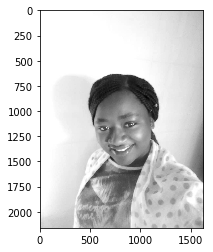

In [136]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

# #OR

height, width = img.shape[:2]
#res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res,cmap='gray')
print(res.shape)

In [121]:
rows,cols = img.shape

M = np.float32([[1,0,200],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [173]:
img = cv2.imread('index.jpeg',0)

In [174]:
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [175]:
img = cv2.imread('index.jpeg') 

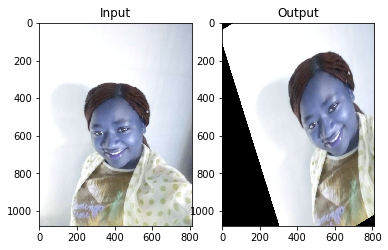

In [187]:
rows,cols,ch = img.shape

pts1 = np.float32([[10,50],[200,100],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


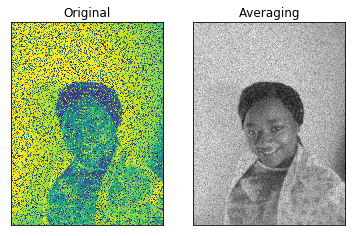

In [159]:
#img = cv2.imread('index.jpeg') 
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

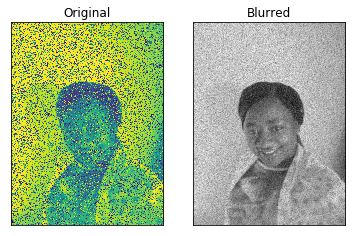

In [169]:
#img = cv2.imread('index.jpeg')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [188]:
img = cv2.imread('index.jpeg')

In [190]:
blur = cv2.GaussianBlur(img,(5,5),0)

In [191]:
blur = cv2.bilateralFilter(img,9,75,75)

 Gaussian noise 

In [248]:
image = cv2.imread('index.jpeg')

row,col,ch= image.shape
mean = 0
var = 0.4
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
gauss=gauss.astype(np.uint8)
noisy = cv2.add(image , gauss)

In [241]:
image.dtype,gauss.dtype,noisy.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

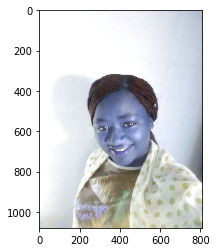

In [242]:
plt.imshow(image)

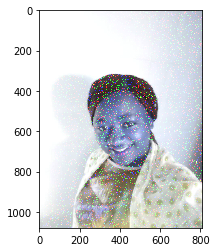

In [243]:
plt.imshow(noisy,cmap='gray')

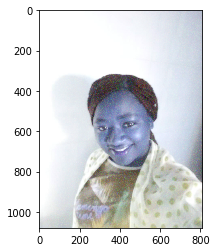

In [244]:
blur = cv2.GaussianBlur(noisy,(5,5),0)
plt.imshow(blur)

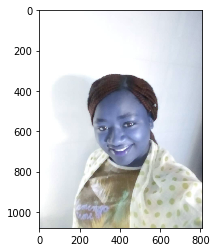

In [245]:
median = cv2.medianBlur(noisy,5)
plt.imshow(median)

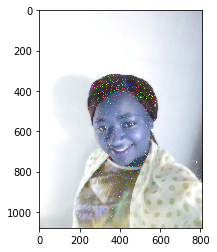

In [246]:
blur = cv2.bilateralFilter(noisy,9,75,75)
plt.imshow(blur)

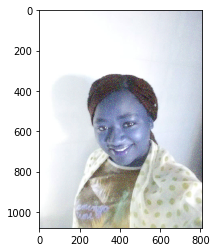

In [247]:
blur = cv2.blur(noisy,(5,5))
plt.imshow(blur)

salt and pepper noise

In [251]:
image = cv2.imread('index.jpeg')

In [250]:
def add_salt_and_pepper(gb, prob):
    '''Adds "Salt & Pepper" noise to an image.
    gb: should be one-channel image with pixels in [0, 1] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy    

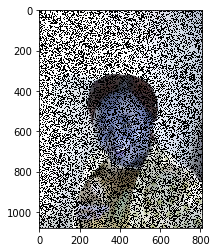

In [259]:
plt.imshow(add_salt_and_pepper(image,0.2))

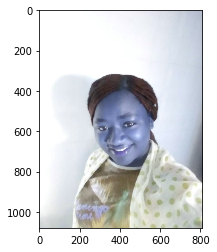

In [260]:
median = cv2.medianBlur(add_salt_and_pepper(image,0.01),5)
plt.imshow(median)